# Colombia: Gender and income.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sys

## Building the dataframe.

In [2]:
people=pd.read_excel('final.xlsx')

In [3]:
people.index=[people['DIRECTORIO_PER'],people['DIRECTORIO_HOG']]
people=people.drop(columns={'DIRECTORIO_HOG','DIRECTORIO_PER'})

In [4]:
data=pd.read_excel('trabajo.xlsx')
data=data.drop(data[data['NPCKP24']==' '].index)
data.index=[data['DIRECTORIO_PER'],data['DIRECTORIO_HOG']]
data=data.drop(columns={'DIRECTORIO_HOG','DIRECTORIO_PER'})


In [5]:
data=data.rename(columns={'NPCKP1':'Trabaja','NPCKP24':'Extra'})
data.head()

,,Trabaja,Extra
DIRECTORIO_PER,DIRECTORIO_HOG,,
10100012,1010001,1,2
10100013,1010001,1,2
10100111,1010011,1,2
10100212,1010021,1,2
10100312,1010031,1,2


In [6]:
people=people.merge(data,how='inner',right_index=True,left_index=True)
people.head()

,,Age,Marital,Gender,Wage_m,Trabaja,Extra
DIRECTORIO_PER,DIRECTORIO_HOG,,,,,,
12401712,1240171,37,2,Female,50000,1,9
24022513,2402251,29,5,Female,1700000,1,2
28212411,2821241,38,2,Male,950000,1,2
11220211,1122021,53,5,Female,5600000,1,2
14438915,1443891,22,5,Female,700000,1,2


In [7]:
people=people.drop(people[people['Extra']==9].index)
people['Extra']=people.Extra.replace({2:0})

In [8]:
people=people.drop(people[people['Gender']=='Intersex'].index)

In [13]:
people.Gender=people.Gender.replace({'Female':1,'Male':0})

In [17]:
people['Gender']=pd.Categorical(people['Gender'],categories=[0,1])


In [19]:
people['Wage_m']=people['Wage_m'].replace({' ': np.NaN})

In [20]:
people=people.dropna()

In [21]:
people.head()

,,Age,Marital,Gender,Wage_m,Trabaja,Extra
DIRECTORIO_PER,DIRECTORIO_HOG,,,,,,
24022513,2402251,29,5,1,1700000,1,0
28212411,2821241,38,2,0,950000,1,0
11220211,1122021,53,5,1,5600000,1,0
14438915,1443891,22,5,1,700000,1,0
10339711,1033971,48,6,1,735800,4,1


In [34]:
ocup={1:'Working', 2: 'Looking for job', 3:
'Studying', 4 :'Housewives', 5:
'Incapacitado(a) permanente para trabajar', 6: 'Other activity'}

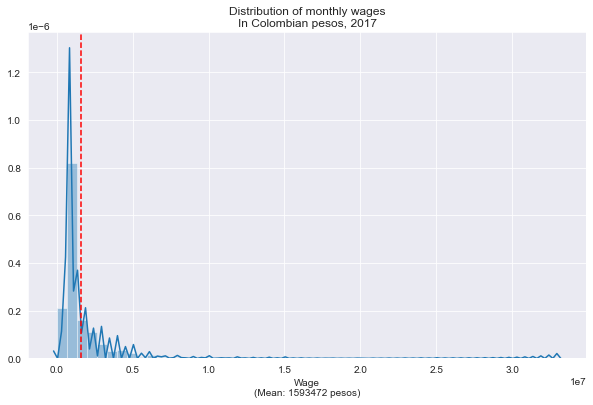

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(people.Wage_m)
plt.axvline(np.mean(people.Wage_m),linestyle ='--',color='red')
plt.title('Distribution of monthly wages\nIn Colombian pesos, 2017')
plt.xlabel('Wage\n(Mean: '+ str(1593472)+' pesos)')
plt.savefig('wage.png')

## Gender and income, F test.

In [22]:
modelo1=sm.OLS.from_formula('Wage_m~Gender',data=people).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wage_m   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.17e-47
Time:                        23:29:12   Log-Likelihood:            -1.4805e+06
No. Observations:               92785   AIC:                         2.961e+06
Df Residuals:                   92783   BIC:                         2.961e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.689e+06   9424.661    179.169      0.000    1.67e+06    1.71e+06
Gender[T.1] -1.963e+05   1.35e+04    -14.510      0.000   -2.23e+05    -1.7e+05
==============================================================================
Omnibus:                    95612.088   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7099171.486
Skew:                           5.142   Prob(JB):                         0.00
Kurtosis:                      44.600   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this part, the hypothesis tests developed under the ANOVA analysis of variance, can say that there is evidence that in Colombia women and men there is a great difference in relation to the salary that each one earns from their jobs, but it can be said that it is in all activities, such as at work or when studying and working at the same time?

In [33]:
tabla=people.groupby('Gender').agg({'Wage_m': np.mean})
tabla.index=['Male','Female']

tabla

,Wage_m
Male,1.688612e+06
Female,1.492351e+06


The difference between the average salary of men and women is two hundred thousand Colombian pesos, although the difference between men is not great if they earn more than women, and it is the difference that the test of the regression shows.

### By occupation


 * Working
 * Looking for job
 * Studying
 * Housewives
 * Other activity

In [36]:
tab=pd.crosstab(people.Gender,people.Trabaja)
sumtab=tab.sum(axis=0)
tab1=tab/sumtab
tab1=tab1.rename(columns=ocup)
tab1.index=['Male','Female']
tab1

Trabaja,Working,Looking for job,Studying,Housewives,Other activity
Male,0.519757,0.542857,0.496395,0.148054,0.420048
Female,0.480243,0.457143,0.503605,0.851946,0.579952


Many of the occupations related to the maintenance of the home for men are more than half, while the housework for women has a large share.

**Working**

In [41]:
muestra1=people[people['Trabaja']==1]

In [42]:
modelo2=sm.OLS.from_formula('Wage_m~Gender',data=muestra1).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wage_m   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     163.7
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.87e-37
Time:                        00:07:01   Log-Likelihood:            -1.4318e+06
No. Observations:               89688   AIC:                         2.864e+06
Df Residuals:                   89686   BIC:                         2.864e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.709e+06   9606.822    177.887      0.000    1.69e+06    1.73e+06
Gender[T.1] -1.774e+05   1.39e+04    -12.796      0.000   -2.05e+05    -1.5e+05
==============================================================================
Omnibus:                    92237.113   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6765176.469
Skew:                           5.129   Prob(JB):                         0.00
Kurtosis:                      44.293   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For people who work, earnings or salary does depend on gender, this is because with a significance level of 5%, the null hypothesis in which the mean salary received by women is equal to the mean can be rejected. of the salary that men receive.

**Looking for job**

In [43]:
muestra2=people[people['Trabaja']==2]

In [44]:
modelo3=sm.OLS.from_formula('Wage_m~Gender',data=muestra2).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wage_m   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.739
Date:                Thu, 17 Sep 2020   Prob (F-statistic):             0.0537
Time:                        00:07:25   Log-Likelihood:                -7607.0
No. Observations:                 525   AIC:                         1.522e+04
Df Residuals:                     523   BIC:                         1.523e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.171e+05   2.82e+04     14.805      0.000    3.62e+05    4.72e+05
Gender[T.1] -8.058e+04   4.17e+04     -1.934      0.054   -1.62e+05    1282.942
==============================================================================
Omnibus:                      564.347   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41869.424
Skew:                           4.779   Prob(JB):                         0.00
Kurtosis:                      45.693   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For people who looking for work, earnings or salary does depend on gender, this is because with a significance level of 10%, the null hypothesis in which the mean salary received by women is equal to the mean can be rejected. of the salary that men receive.


**Studying**

In [46]:
muestra3=people[people['Trabaja']==3]

In [47]:
modelo4=sm.OLS.from_formula('Wage_m~Gender',data=muestra3).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wage_m   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.595
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.108
Time:                        00:12:41   Log-Likelihood:                -15062.
No. Observations:                 971   AIC:                         3.013e+04
Df Residuals:                     969   BIC:                         3.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      8.5e+05   6.02e+04     14.127      0.000    7.32e+05    9.68e+05
Gender[T.1] -1.366e+05   8.48e+04     -1.611      0.108   -3.03e+05    2.98e+04
==============================================================================
Omnibus:                     1344.549   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           283611.728
Skew:                           7.605   Prob(JB):                         0.00
Kurtosis:                      85.332   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For people who study, earnings or salary does not depend on gender, this is because with a significance level of 5%, the null hypothesis in which the mean salary received by women is equal to the null hypothesis cannot be rejected. average salary received by men.

**Housewives**

In [48]:
muestra4=people[people['Trabaja']==4]

In [49]:
modelo5=sm.OLS.from_formula('Wage_m~Gender',data=muestra4).fit()
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wage_m   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     21.17
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           4.65e-06
Time:                        00:20:12   Log-Likelihood:                -17959.
No. Observations:                1182   AIC:                         3.592e+04
Df Residuals:                    1180   BIC:                         3.593e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.086e+05   7.26e+04     11.135      0.000    6.66e+05    9.51e+05
Gender[T.1]  -3.62e+05   7.87e+04     -4.601      0.000   -5.16e+05   -2.08e+05
==============================================================================
Omnibus:                     1606.925   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295092.537
Skew:                           7.520   Prob(JB):                         0.00
Kurtosis:                      78.931   Cond. No.                         5.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For people who are housewives, earnings or salary depends on gender, this is because with a significance level of 5%, the null hypothesis in which the mean salary received by women is equal to the average salary received by men.

**Other activity**

In [50]:
muestra5=people[people['Trabaja']==6]

In [51]:
modelo6=sm.OLS.from_formula('Wage_m~Gender',data=muestra5).fit()
modelo6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wage_m   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05607
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.813
Time:                        00:22:06   Log-Likelihood:                -6699.9
No. Observations:                 419   AIC:                         1.340e+04
Df Residuals:                     417   BIC:                         1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.537e+06   1.61e+05      9.552      0.000    1.22e+06    1.85e+06
Gender[T.1]  5.002e+04   2.11e+05      0.237      0.813   -3.65e+05    4.65e+05
==============================================================================
Omnibus:                      337.899   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5663.478
Skew:                           3.424   Prob(JB):                         0.00
Kurtosis:                      19.658   Cond. No.                         2.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For people who perform other activities, earnings or salary does not depend on gender, this is because with a significance level of 5%, the null hypothesis in which the mean salary received by women is the same cannot be rejected to the average salary that men receive.

## Conclution

When looking at the effect of gender on income, it can be concluded that there are differences between men and women. On the other hand, when we look at these effects by economic activity that the person performs home chores or housewives, they show the dispersion between the salaries of women compared to men. When looking at work or looking for one, this difference of being a man or a woman is also visible. But when we look at the people who study or who carry out other economic activity, there are no differences between men and women in terms of salary.